## Advanced Regression Assignment

- Name: Gautam Bhutani
- Email: bhutanigautam185@gmail.com
- Batch: C37

## Business Problem

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding and Exploration

In [42]:
# importing all the important libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the dimensions
house_df.shape

(1460, 81)

In [5]:
# Check for column details
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# To get the description of the dataset
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#checking duplicates
sum(house_df.duplicated(subset = 'Id')) == 0

True

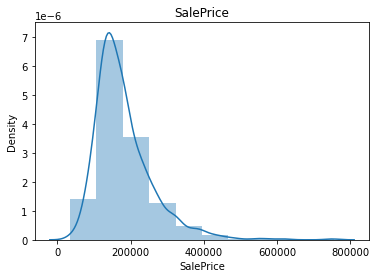

In [8]:
# Visualise the target variable

#house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

In [9]:
# Checking for null value columns
house_df.isnull().sum()[round(100*(house_df.isnull().sum()/len(house_df.index)), 2) > 0.00]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Replace NA with None in the following columns below : 

for col in ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']:
    
    house_df[col]=house_df[col].fillna('None')

In [11]:
# Checking for null value columns
house_df.isnull().sum()[round(100*(house_df.isnull().sum()/len(house_df.index)), 2) > 0.00]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [59]:
#Distribution and box plots function
def bi_plots(var):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title(f"{var} Distribution", fontdict = {'fontsize' : 20})
    sns.distplot(house_df[var], hist=False,rug=True)
    plt.subplot(1,2,2)
    plt.title(f"{var} vs Count", fontdict = {'fontsize' : 20})
    sns.boxplot(y = var, palette='CMRmap', data = house_df)
    plt.show()

In [57]:
house_df['LotFrontage'].describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
95%       456.000000
99%       791.280000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

house_df['LotFrontage'] = house_df['LotFrontage'].replace(np.nan, house_df['LotFrontage'].median())
house_df['MasVnrArea'] = house_df['MasVnrArea'].replace(np.nan, house_df['MasVnrArea'].median())


# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

house_df['GarageYrBlt']=house_df['GarageYrBlt'].fillna(0)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].astype(int)


In [14]:
# Check if there are any duplicate values in the dataset

house_df[house_df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Checking Outliers in the data

In [15]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,144

## Outlier Treatment

In [ ]:
# Check the outliers in all the numeric columns

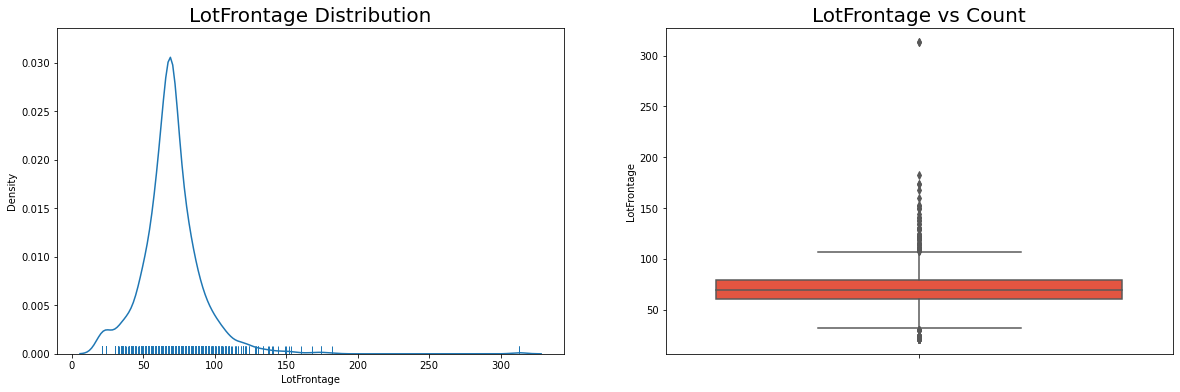

In [62]:
bi_plots('LotFrontage')

In [18]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [19]:
# # outlier treatment
# plt.boxplot(house_df['LotArea'])
# Q1 = house_df['LotArea'].quantile(0.1)
# Q3 = house_df['LotArea'].quantile(0.9)
# IQR = Q3 - Q1
# house_df = house_df[(house_df['LotArea'] >= Q1 - 1.5*IQR) & 
#                       (house_df['LotArea'] <= Q3 + 1.5*IQR)]

In [ ]:
bi_plots('MasVnrArea')

In [ ]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [ ]:
bi_plots('TotalBsmtSF')

In [ ]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [ ]:
bi_plots('WoodDeckSF')

In [ ]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [ ]:
bi_plots('OpenPorchSF')

In [ ]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [20]:
# Determine the percentage of data retained

num_data = round(100*(len(house_df)/1460),2)
print(num_data)

100.0


In [21]:
# Check the shape of the dataframe

house_df.shape

(1460, 81)

In [22]:
house_df = house_df.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,250000


In [23]:
house_df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [24]:
house_df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [25]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= house_df.select_dtypes(include=['float64', 'int64'])

In [26]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,250000


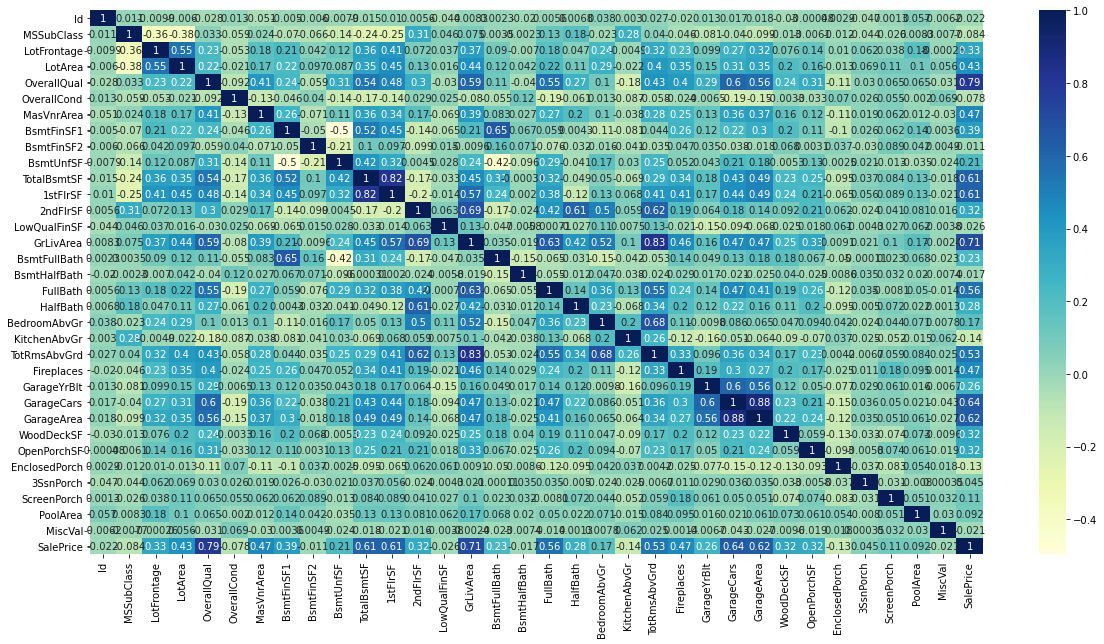

In [27]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

In [28]:
# Removing the highly correlated variables

house_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [29]:
columns = []
numerical_columns = house_df.select_dtypes(include=['int64', 'float'])
for col in (numerical_columns):
    if(house_df[col].value_counts().max() >= 1241):
        columns.append(col)

In [30]:
house_df = house_df.drop(['GarageQual','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','MiscFeature','PavedDrive','BsmtCond','SaleType',
'KitchenAbvGr','CentralAir', '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal','Street', 'Alley','Utilities','RoofMatl',
'Condition1', 'Condition2','LandSlope', 'Heating','BsmtFinType2', 'Electrical','GarageCond', 'Fence','Functional' ,'ExterCond',], axis = 1)

In [31]:
house_df.shape

(1460, 46)

In [32]:
# Drop 'Id' from Dataframe

house_df = house_df.drop(['Id'], axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,2003,RFn,2,0,61,0,Normal,208500
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,1976,RFn,2,298,0,0,Normal,181500
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,2001,RFn,2,0,42,0,Normal,223500
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,1998,Unf,3,0,35,272,Abnorml,140000
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,2000,RFn,3,192,84,0,Normal,250000


In [33]:
# Since the values of the following fields are ordinal, we will assign values in sequence order

# For values which can be ordered, we have given an ordered sequence value

house_df['LandContour'] = house_df['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
house_df['LotShape'] = house_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_df['ExterQual'] = house_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_df['BsmtQual'] = house_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['BsmtExposure'] = house_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_df['HeatingQC'] = house_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['KitchenQual'] = house_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['GarageFinish'] = house_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_df['BldgType'] = house_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_df['HouseStyle'] = house_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_df['LotConfig'] = house_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_df['MasVnrType'] = house_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_df['SaleCondition'] = house_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [34]:
#Encoding the cat columns
house_df = pd.get_dummies(data=house_df,columns=["MSZoning","Neighborhood","RoofStyle","Exterior1st","Exterior2nd","Foundation","GarageType"],drop_first=True)

In [35]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 111 entries, MSSubClass to GarageType_None
dtypes: float64(3), int32(1), int64(34), uint8(73)
memory usage: 531.9 KB


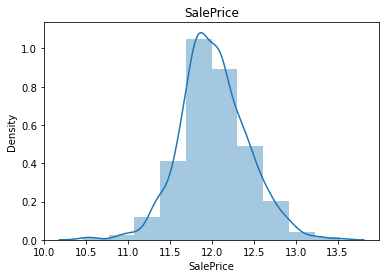

In [36]:
#Tranforming the SalePrice variable
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

## Model Building

In [37]:
# Putting all feature variable to X

X = house_df.drop(['SalePrice'], axis=1)

In [38]:
# Putting response variable to y

y = house_df['SalePrice']

In [39]:
# scale
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [40]:
# split into train and test


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [44]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=16)            
rfe = rfe.fit(X_train, y_train)

In [45]:
#Columns selected by RFE
[i for i in list(zip(X_train.columns,rfe.support_,rfe.ranking_)) if i[1]==True]

[('OverallQual', True, 1),
 ('GarageCars', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RL', True, 1),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_Veenker', True, 1),
 ('Exterior1st_BrkComm', True, 1),
 ('Exterior1st_Stone', True, 1),
 ('Exterior2nd_Stone', True, 1),
 ('GarageType_Attchd', True, 1),
 ('GarageType_BuiltIn', True, 1),
 ('GarageType_None', True, 1)]

In [46]:
#Selecting features those came out to be true in RFE
X_train.columns[rfe.support_]

Index(['OverallQual', 'GarageCars', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Veenker',
       'Exterior1st_BrkComm', 'Exterior1st_Stone', 'Exterior2nd_Stone',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_None'],
      dtype='object')

In [47]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train)

In [48]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     77.31
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:54:05   Log-Likelihood:                 685.82
No. Observations:                1021   AIC:                            -1154.
Df Residuals:                     912   BIC:                            -616.4
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6356      0.655     14.722      0.000       8.351      10.920
MSSubClass              -0.0003      0.000     -1.324      0.186      -0.001       0.000
LotFrontage             -0.0010      0.000     -3.954      0.000      -0.001      -0.000
LotArea               1.224e-05   2.07e-06      5.907      0.000    8.17e-06    1.63e-05
LotShape                 0.0034      0.009      0.392      0.695      -0.013       0.020
LandContour              0.0008      0.009      0.088      0.930      -0.017       0.018
LotConfig                0.0041      0.006      0.704      0.481      -0.007       0.015
BldgType                -0.0204      0.011     -1.853      0.064      -0.042       0.001
HouseStyle              -0.0073      0.004     -1.905      0.057      -0.015       0.000
OverallQual              0.0615      0.006      9.622      0.000       0.049       0.074
OverallCond              0.0368      0.005      7.701      0.000       0.027       0.046
MasVnrType               0.0184      0.014      1.312      0.190      -0.009       0.046
MasVnrArea           -4.194e-05   3.99e-05     -1.051      0.294      -0.000    3.64e-05
ExterQual               -0.0064      0.013     -0.482      0.630      -0.032       0.020
BsmtQual                 0.0441      0.010      4.512      0.000       0.025       0.063
BsmtExposure             0.0203      0.005      3.785      0.000       0.010       0.031
BsmtFinType1             0.0117      0.003      3.595      0.000       0.005       0.018
BsmtFinSF1           -2.279e-05    3.1e-05     -0.734      0.463   -8.37e-05    3.81e-05
BsmtUnfSF            -9.417e-06   3.13e-05     -0.301      0.764   -7.08e-05     5.2e-05
TotalBsmtSF           -6.99e-06   3.72e-05     -0.188      0.851      -8e-05     6.6e-05
HeatingQC                0.0184      0.006      3.011      0.003       0.006       0.030
1stFlrSF                -0.0002      0.000     -1.639      0.101      -0.000    3.32e-05
2ndFlrSF                -0.0002      0.000     -2.130      0.033      -0.000    -1.7e-05
GrLivArea                0.0003   9.82e-05      3.490      0.001       0.000       0.001
BsmtFullBath             0.0503      0.012      4.213      0.000       0.027       0.074
FullBath                 0.0525      0.014      3.818      0.000       0.026       0.080
HalfBath                 0.0473      0.013      3.592      0.000       0.021       0.073
BedroomAbvGr             0.0275      0.008      3.631      0.000       0.013       0.042
KitchenQual              0.0281      0.011      2.631      0.009       0.007       0.049
Fireplaces               0.0248      0.014      1.738      0.082      -0.003       0.053
FireplaceQu              0.0076      0.005      1.448      0.148      -0.003       0.018
GarageYrBlt              0.0003      0.000      0.780    

In [63]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,GarageCars,True,1
2,MSZoning_FV,True,1
3,MSZoning_RL,True,1
4,Neighborhood_Blueste,True,1
5,Neighborhood_BrDale,True,1
6,Neighborhood_ClearCr,True,1
7,Neighborhood_Crawfor,True,1
8,Neighborhood_NoRidge,True,1
9,Neighborhood_Veenker,True,1


In [64]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [65]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [66]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.135040,-0.137968,1
12,1.0,-0.134731,-0.137979,2
11,0.9,-0.134695,-0.137993,3
10,0.8,-0.134658,-0.138009,4
9,0.7,-0.134618,-0.138028,5
8,0.6,-0.134576,-0.138050,6
14,3.0,-0.135342,-0.138058,7
7,0.5,-0.134532,-0.138077,8
6,0.4,-0.134485,-0.138109,9
5,0.3,-0.134432,-0.138148,10


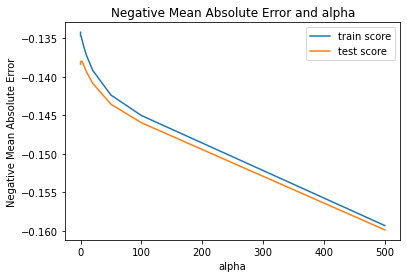

In [68]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [70]:
# check the coefficient values with lambda = 10

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.15716135,  0.1508566 ,  0.12170207,  0.12737397, -0.0727516 ,
       -0.1470302 ,  0.22853899,  0.17841738,  0.17341311,  0.12501025,
       -0.24065519,  0.05126458, -0.06004585,  0.08862137,  0.14874339,
        0.04541758])

In [72]:
# Check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.035928197834462945

In [73]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.1572
1,GarageCars,0.1509
2,MSZoning_FV,0.1217
3,MSZoning_RL,0.1274
4,Neighborhood_Blueste,-0.0728
5,Neighborhood_BrDale,-0.1470
6,Neighborhood_ClearCr,0.2285
7,Neighborhood_Crawfor,0.1784
8,Neighborhood_NoRidge,0.1734
9,Neighborhood_Veenker,0.1250
